In [1]:
import os
import re
import string
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import requests

url = 'http://nlp.stanford.edu/data/glove.6B.zip'
response = requests.get(url)
with open('glove.6B.zip', 'wb') as file:
    file.write(response.content)

In [6]:
import zipfile

zip_file_path = 'glove.6B.zip'
extract_to_path = 'glove.6B'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Extracted {zip_file_path} to {extract_to_path}')

Extracted glove.6B.zip to glove.6B


In [3]:
# download pretrained GloVe word embeddings
#! wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-06-28 10:45:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-28 10:45:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
Unable to establish SSL connection.


In [4]:
#! unzip glove*.zip

unzip:  cannot find any matches for wildcard specification "glove*.zip".

No zipfiles found.


In [17]:
gloveFile = r"C:\Users\DELL\Desktop\mini\glove.6B\glove.6B.300d.txt"
dim=300

In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def rem_ascii(s):
    return "".join([c for c in s if ord(c) < 128 ])

# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed

def loadGloveModel(gloveFile):
    word_embeddings = {}
    f = open(gloveFile, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings



In [18]:
word_embeddings = loadGloveModel(gloveFile)

In [19]:
print("Vocab Size = ",len(word_embeddings))

Vocab Size =  400000


In [20]:
text = """The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. It is a very clever animal and is very useful in catching thieves. It runs very fast, barks loudly and attacks the strangers. A dog saves the life of the master from danger. One can find dogs everywhere in the world. Dogs are a very faithful animal. It has a sharp mind and a strong sense of hearing smelling the things. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. They are also helpful in reducing stress, anxiety, and depression, loneliness, encourage exercise and playfulness and even improve your cardiovascular health. A dog also provides valuable companionship for older adults. The dogs are so loyal to his master that nothing can induce him to leave his master. His master might be a poor man or even a beggar but still, the dog will not leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. Dogs are honest friends who are always ready to die to save a friend. It can bite a thief or stranger when they ignore its barking and try to mischief. Dogs always give security to the owner day and night."""
print(text)

The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. It is a very clever animal and is very useful in catching thieves. It runs very fast, barks loudly and attacks the strangers. A dog saves the life of the master from danger. One can find dogs everywhere in the world. Dogs are a very faithful animal. It has a sharp mind and a strong sense of hearing smelling the things. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. They are also helpful in reducing stress, anxiety, and depression, loneliness, encourage exercise and playfulness and even improve your cardiovascular health. A dog also provides valuable comp

In [21]:
sentences = sent_tokenize(text)
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

In [22]:
sentence_vectors = []
for i in cleaned_texts:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)

[[0.    0.514 0.544 0.321 0.569 0.55  0.813 0.301 0.414 0.611 0.659 0.625
  0.313 0.581 0.477 0.494 0.49  0.522 0.442 0.502]
 [0.514 0.    0.492 0.462 0.507 0.639 0.502 0.611 0.625 0.555 0.618 0.66
  0.361 0.507 0.482 0.624 0.606 0.583 0.497 0.583]
 [0.544 0.492 0.    0.38  0.518 0.534 0.554 0.42  0.54  0.423 0.534 0.585
  0.393 0.552 0.497 0.542 0.507 0.523 0.549 0.435]
 [0.321 0.462 0.38  0.    0.392 0.539 0.348 0.479 0.5   0.324 0.444 0.543
  0.319 0.387 0.366 0.475 0.526 0.504 0.459 0.526]
 [0.569 0.507 0.518 0.392 0.    0.645 0.532 0.487 0.589 0.422 0.496 0.654
  0.427 0.564 0.682 0.757 0.696 0.669 0.478 0.628]
 [0.55  0.639 0.534 0.539 0.645 0.    0.616 0.593 0.78  0.486 0.651 0.808
  0.479 0.651 0.642 0.769 0.799 0.76  0.514 0.778]
 [0.813 0.502 0.554 0.348 0.532 0.616 0.    0.349 0.465 0.529 0.696 0.693
  0.315 0.571 0.592 0.532 0.548 0.604 0.426 0.553]
 [0.301 0.611 0.42  0.479 0.487 0.593 0.349 0.    0.756 0.332 0.443 0.618
  0.581 0.477 0.517 0.635 0.668 0.613 0.509 0.638]
 

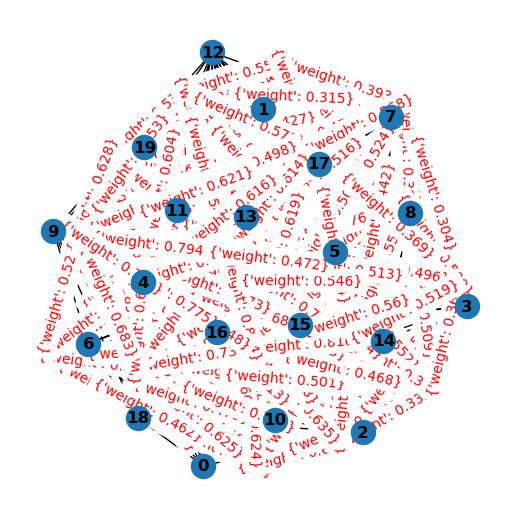

In [23]:
sim_mat = np.zeros([len(cleaned_texts), len(cleaned_texts)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)

# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [25]:
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.04663547717156963, 1: 0.04939319818755248, 2: 0.045749458480302624, 3: 0.040743837227688526, 4: 0.050496749210398505, 5: 0.05665267066444021, 6: 0.04861567762955979, 7: 0.04775010408795955, 8: 0.053847040876778336, 9: 0.042079941667816034, 10: 0.050519685724067946, 11: 0.058901153523495446, 12: 0.04074819748912716, 13: 0.05020045459799207, 14: 0.05125718114129963, 15: 0.05651250539735581, 16: 0.05629525899821312, 17: 0.05521667009858541, 18: 0.043518673377186984, 19: 0.054866064448610724}


In [26]:
ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.5)], key=lambda x:x[1])
print("\n".join([sentences[x[1]] for x in arranged_sentences]))

A dog saves the life of the master from danger.
One can find dogs everywhere in the world.
It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense.
Dogs are sometimes called canines.
Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans.
The dogs are so loyal to his master that nothing can induce him to leave his master.
His master might be a poor man or even a beggar but still, the dog will not leave his master from far off.
Dogs see their master coming home from work they rush to them and jump on them to show their love.
Dogs are honest friends who are always ready to die to save a friend.
Dogs always give security to the owner day and night.


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Example reference summary and generated summary
reference_summary = "The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. A dog saves the life of the master from danger. Dogs are a very faithful animal. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes referred to as man`s best friend because they are kept as domestic pets and are usually loyal and like being around humans. The dogs are so loyal to his master that nothing can induce him to leave his master. His master might be a poor man or even a beggar but still, the dog will not leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. It can bite a thief or stranger when they ignore its barking and try to mischief."
generated_summary = "A dog saves the life of the master from danger. One can find dogs everywhere in the world. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. The dogs are so loyal to his master that nothing can induce him to leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. Dogs are honest friends who are always ready to die to save a friend. Dogs always give security to the owner day and night."

# Tokenize sentences (simple example, can be extended)
vectorizer = CountVectorizer().fit_transform([reference_summary, generated_summary])
vectors = vectorizer.toarray()

# Calculate cosine similarity between reference and generated summary
cosine_similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

# Print cosine similarity scores
print("Cosine Similarity Scores:", cosine_similarities)

# Example: Calculate average similarity score
average_similarity_score = sum(cosine_similarities) / len(cosine_similarities)
print("Average Similarity Score:", average_similarity_score)

Cosine Similarity Scores: [0.79705296]
Average Similarity Score: 0.7970529570775182
